<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
# boxplot to show median value of owner-occupied homes

sns.boxplot(y="MEDV", data=boston_df)
ax.set_title("box plot of median value of owner-occupied homes in $1000s")
pyplot.show()


<class 'NameError'>: name 'ax' is not defined

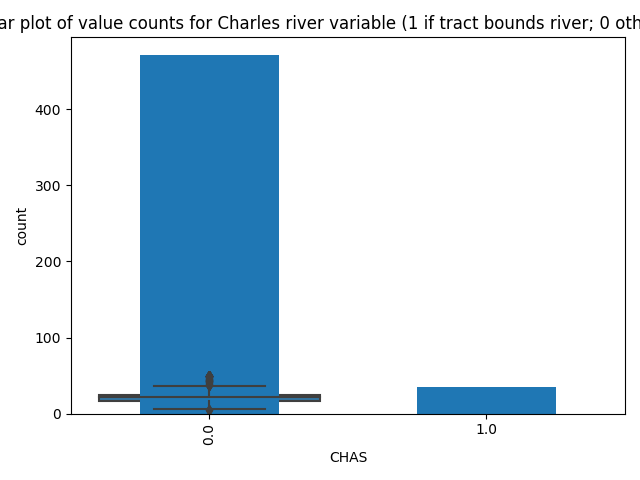

In [6]:
#Provide a  bar plot for the Charles river variable (CHAS)

ax = boston_df['CHAS'].value_counts().plot(kind='bar')
ax.set_xlabel('CHAS')
ax.set_ylabel('count')
ax.set_title("bar plot of value counts for Charles river variable (1 if tract bounds river; 0 otherwise).")
pyplot.tight_layout()
pyplot.show()

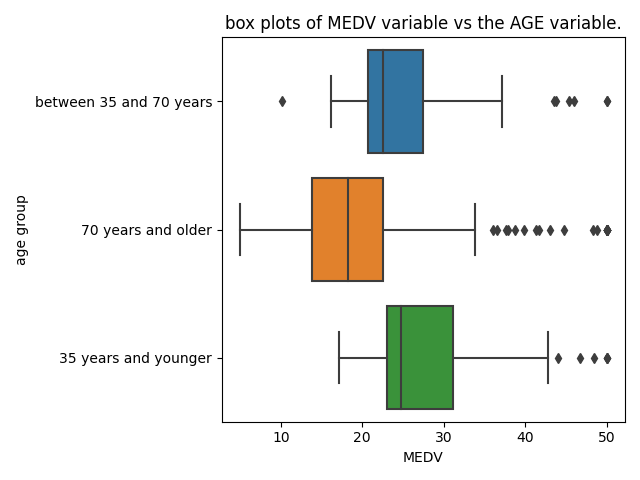

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age group'] = '70 years and older'

ax = sns.boxplot(x='MEDV', y='age group', data=boston_df)
ax.set_title("box plots of MEDV variable vs the AGE variable.")
pyplot.tight_layout()
pyplot.show()

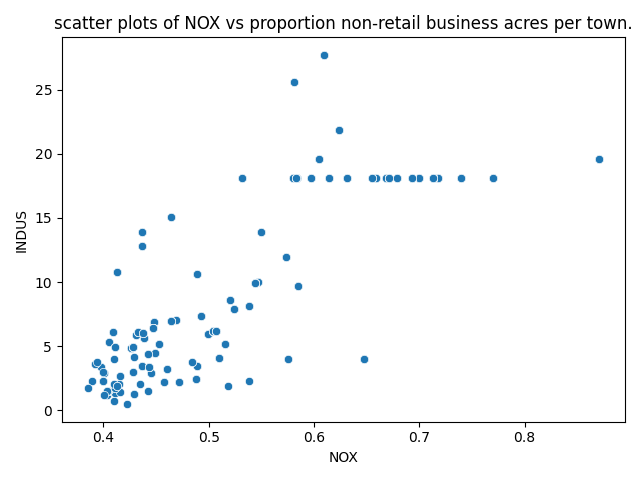

Generally a positive relationship between NOX and INDUS until 0.7 NOX where INDUS plateaus.


In [8]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title("scatter plots of NOX vs proportion non-retail business acres per town.")
pyplot.tight_layout()
pyplot.show()

print("Generally a positive relationship between NOX and INDUS until 0.7 NOX where INDUS plateaus.")

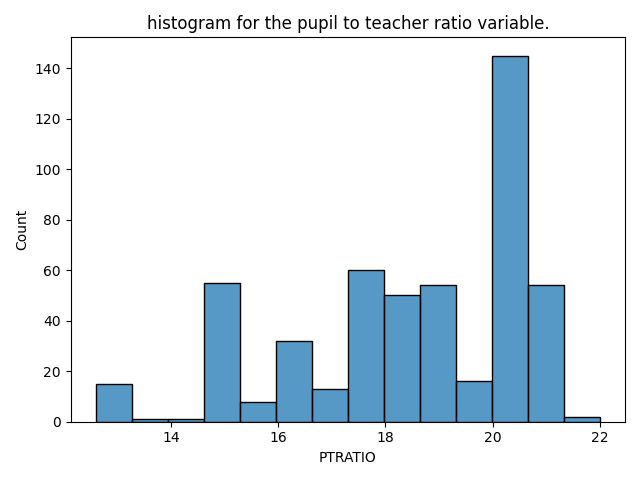

In [9]:
# Create a histogram for the pupil to teacher ratio variable

ax = sns.histplot(data=boston_df, x='PTRATIO')
ax.set_title("histogram for the pupil to teacher ratio variable.")
pyplot.tight_layout()
pyplot.show()

In [10]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river.
# Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river.

print(scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], center='median'))

print("\npvalue being 0.0326 < 0.05, variance between the 2 CHAS is significantly different\n")

print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], equal_var = False))

print("\npvalue being 0.00356 < 0.05, reject H0, median between the 2 CHAS is significantly different\n")

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

pvalue being 0.0326 < 0.05, variance between the 2 CHAS is significantly different

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

pvalue being 0.00356 < 0.05, reject H0, median between the 2 CHAS is significantly different



In [11]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Null Hypothesis (H0): There is no significant difference in the MEDV with the 3 age groups.
# Alternative Hypothesis (H1): There is a significant difference in the MEDV with the 3 age groups.

f_stats, p_value = scipy.stats.f_oneway(boston_df[boston_df["age group"] == '35 years and younger']["MEDV"], 
                                        boston_df[boston_df["age group"] == 'between 35 and 70 years']["MEDV"], 
                                        boston_df[boston_df["age group"] == '70 years and older']["MEDV"])

print(f_stats, p_value)

print("\npvalue being 1.7105011022702984e-15 < 0.05, reject H0, median between the 3 age groups is significantly different\n")

36.40764999196599 1.7105011022702984e-15

pvalue being 1.7105011022702984e-15 < 0.05, reject H0, median between the 3 age groups is significantly different



In [12]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

print(scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']))

print("\npvalue being 7.913361061211254e-98 < 0.05, reject H0, there is relationship\n")

(0.7636514469209189, 7.913361061211254e-98)

pvalue being 7.913361061211254e-98 < 0.05, reject H0, there is relationship



In [13]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# Null Hypothesis (H0): No impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# Alternative Hypothesis (H1): There is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions=model.predict(X)
print(model.summary())

print("\npvalue being 1.21e-08 < 0.05, reject H0, there is impact\n")
print("\nimpact to MEDV is 1.0916 (coef of DIS) of DIS\n")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.21e-08
Time:                        16:45:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0